In [2]:
import numpy as np, prjlib, plottools as pl, healpy as hp, pickle, curvedsky, tools_lens, binning as bn
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import matplotlib.ticker
params = {
    'figure.figsize':[6,4],
    'axes.labelsize': 16,
    'legend.fontsize': 14,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'text.usetex': True,
    'font.family': "Times New Roman", 
    }
plt.rcParams.update(params)
#fig_kwargs = {'ylabsize':18,'xticks_labsize':16,'yticks_labsize':16,'legend_size':14}

In [3]:
pobj, qobj = {}, {}
for ntype in ['base','goal']:
    pobj[ntype] = prjlib.analysis_init(t='la',freq='com',fltr='none',ntype=ntype+'_roll50')
    qobj[ntype] = tools_lens.init_qobj(pobj[ntype].stag,doreal=False,rlmin=300,rlmax=4096,n0max=50)

In [4]:
al, n0, ml, cl, xl, kk = {}, {}, {}, {}, {}, {}
for ntype in ['base','goal']:
    for q in ['TT','TE','EE','EB']:
        al[ntype+q] = (np.loadtxt(qobj[ntype].f[q].al)).T[1]
        n0[ntype+q] = (np.loadtxt(qobj[ntype].f[q].n0bs)).T[1]
        ml[ntype+q] = (np.loadtxt(qobj[ntype].f[q].mfcl[1])).T[1]
        cl[ntype+q], xl[ntype+q], kk = np.loadtxt(qobj[ntype].f[q].mcls,unpack=True,usecols=(1,3,4))

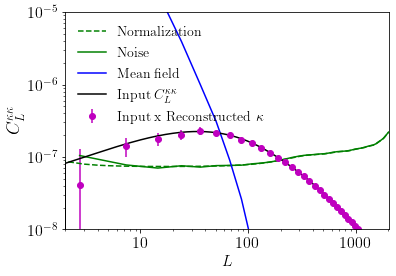

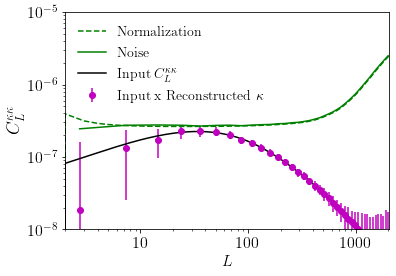

In [7]:
co = rcParams['axes.prop_cycle'].by_key()['color']
l = qobj['base'].l
ntype = 'base'
mb = bn.multipole_binning(40,lmin=1,lmax=2048,spc='p2')
#for i, q in enumerate(['TT','TE','EE','EB']):
for i, q in enumerate(['TT','EB']):
    mkk, vkk, skk = bn.binned_spec(mb,qobj[ntype].f[q].cl[1:101],cn=1,doreal=False)
    fig, ax = plt.subplots(1, 1)
    ax.set_xlim(2,2048)
    ax.set_ylim(1e-8,1e-5)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel(r'$L$',fontsize=16)
    ax.set_ylabel(r'$C_L^{\kappa\kappa}$',fontsize=18)
    plt.gcf().subplots_adjust(left=0.15)
    ax.plot(l,al[ntype+q],'g--',label='Normalization')
    ax.plot(mb.bc,bn.binning(n0[ntype+q],mb),'g',label='Noise')
    if q!='EB':
        ax.plot(mb.bc,bn.binning(ml[ntype+q]-cl[ntype+q]/100.,mb),'b',label='Mean field')
    ax.errorbar(mb.bc,bn.binning(xl[ntype+q],mb),yerr=vkk,fmt='o',label=r'Input x Reconstructed $\kappa$',color='m')
    #errorbar(mb.bc,bn.binning(cl[ntype+q]-n0[ntype+q]-cl[ntype+q]/100.,mb),yerr=vkk,fmt='o',label='Measured lensing spectrum',color='m')
    ax.plot(pobj['base'].l,pobj['base'].kk,'k',label=r'Input $C_L^{\kappa\kappa}$')
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.get_xaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())
    legend(loc=2)
    savefig('fig_lens_aps_'+q+'.pdf')
    show()